# Image Processing with keras in Python

Para los computadores las imagenes no son mas que un conjunto de numeros.

Las imagenes en colores tienen 3 dimensiones:
    - Altura
    - Ancho
    - RGB

## 0 - Dataset

El dataset a usar durante todo este notebook lo pueden obtener en https://www.kaggle.com/paramaggarwal/fashion-product-images-small

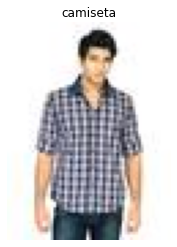

In [17]:
import matplotlib.pyplot as plt
ruta = "datasets/myntradataset/images/15970.jpg"
camiseta = plt.imread(ruta)
plt.imshow(camiseta)
plt.title("camiseta")
plt.axis('off')
plt.show()

El dataset viene con un csv en donde se indican las etiquetas de cada uno de los productos

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("datasets/myntradataset/styles.csv", error_bad_lines=False)

print(df.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [19]:
df[df['id'] == 15970]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt


¿Cuantas categorias distintas hay en el dataset?

In [20]:
df["articleType"].nunique()

143

In [21]:
df["articleType"].unique()

array(['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks',
       'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra',
       'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant',
       'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas',
       'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees',
       'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests',
       'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket',
       'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring',
       'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers',
       'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta',
       'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics',
       'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser',
       'Necklace and Chains', 'Duffel Bag', 'Sports Sandals',
       'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag',
       'Tracksuits', 'S

In [9]:
df["articleType"].value_counts()[:10]

Tshirts         7067
Shirts          3217
Casual Shoes    2845
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: articleType, dtype: int64

Para usar menos memoria limitaremos el dataset a solo tres categorias Shirts, Casual Shoes y Watches

In [22]:
df = df[df["articleType"].isin(["Shirts", 'Watches', 'Casual Shoes'])]

In [11]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


## 1- Clasificando imagenes

### 1.1- One Hot encoding

Vamos a crear un array en donde cada clasificacion corresponda a un elemento del vector

In [23]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# El termino ignore hara que las categorias que no estan presentes al momento de hacer un fit
# No aparezcan despues
enc = OneHotEncoder(handle_unknown='ignore')
oneHot = enc.fit_transform(np.array(df['articleType']).reshape(-1, 1))

In [13]:
oneHot.toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [14]:
enc.get_feature_names()

array(['x0_Casual Shoes', 'x0_Shirts', 'x0_Watches'], dtype=object)

In [24]:
df = pd.concat([df.reset_index(drop=True),
                pd.DataFrame(oneHot.toarray(), columns=enc.get_feature_names())], axis=1)

In [25]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,x0_Casual Shoes,x0_Shirts,x0_Watches
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,0.0,1.0,0.0
1,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,0.0,0.0,1.0
2,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,0.0,1.0,0.0
3,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,0.0,1.0,0.0
4,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,0.0,0.0,1.0


### 1.2- Entrenando una red full conectada

Todos los nodos de un layer estan conectados con todos los nodos del layer anterior

In [47]:
from tensorflow.keras.layers import Dense
from skimage import color
from sklearn.model_selection import train_test_split

df_ = df_.sample(1000)

X_train, X_test, y_train, y_test = train_test_split(df_[['id']],
                                                    df_[['x0_Casual Shoes', 'x0_Shirts',
                                                        'x0_Watches']],  test_size=0.33,
                                                    random_state=42)
X_train.reset_index(inplace=True, drop=True)
train_data = []
for i in range(len(X_train)):
    # Cargamos los datos
    file = X_train.loc[i, "id"]
    ruta = f"datasets/myntradataset/images/{file}.jpg"
    image = plt.imread(ruta)
    # La pasamos a blamco y negro
    image = np.array(color.rgb2gray(image))
    train_data.append(image)

X_test.reset_index(inplace=True, drop=True)
test_data = []
for i in range(len(X_test)):
    # Cargamos los datos
    file = X_test.loc[i, "id"]
    ruta = f"datasets/myntradataset/images/{file}.jpg"
    image = plt.imread(ruta)
    # La pasamos a blamco y negro
    image = np.array(color.rgb2gray(image))
    test_data.append(image)    

In [48]:
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

El término input_shape nos dice cuantos inputs tiene cada una de las imagenes

In [49]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(Dense(100, activation='relu', input_shape=(80*60,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [50]:
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
train_data = train_data.reshape((670, 80*60))
test_data = test_data.reshape((330, 80*60))

In [53]:
y_train = y_train.to_numpy().reshape((670, 3*1))
y_test = y_test.to_numpy().reshape((330, 3*1))

In [54]:
model.fit(train_data, y_train, validation_split=0.2,
          epochs=100)

Epoch 1/100
17/17 [==============================] - 1s 30ms/step - loss: 4.8655 - accuracy: 0.4084 - val_loss: 13.9205 - val_accuracy: 0.2836
Epoch 2/100
17/17 [==============================] - 0s 16ms/step - loss: 15.5340 - accuracy: 0.3169 - val_loss: 11.6915 - val_accuracy: 0.4851
Epoch 3/100
17/17 [==============================] - 0s 16ms/step - loss: 9.2382 - accuracy: 0.4363 - val_loss: 15.2771 - val_accuracy: 0.4179
Epoch 4/100
17/17 [==============================] - 0s 16ms/step - loss: 6.1447 - accuracy: 0.4888 - val_loss: 9.5110 - val_accuracy: 0.5299
Epoch 5/100
17/17 [==============================] - 0s 16ms/step - loss: 1.1112 - accuracy: 0.6423 - val_loss: 0.4106 - val_accuracy: 0.8582
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 0.3835 - accuracy: 0.8730 - val_loss: 0.2892 - val_accuracy: 0.8955
Epoch 7/100
17/17 [==============================] - 0s 15ms/step - loss: 0.3035 - accuracy: 0.9166 - val_loss: 0.2564 - val_accuracy: 0.9030
Ep

In [55]:
model.evaluate(test_data, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9848


[0.0440518744289875, 0.9848484992980957]

### 2- Convoluciones

En una red full conectada cada pixel estaba conectado de alguna forma con los pesos del siguiente layer. Sin embargo, los pixeles de una imagen suelen estar relacionados con los pixeles vecinos

Un ejemplo de esto se da cuando las imagenes tienen borde y todos los pixeles en el borde cumplen un patrón similar

Buscar una misma caracteristica, como una forma u orientacion particular, en cada subparte de una imagen es la idea de la operación matematica llamada convolución

### 2.1 - ¿Qué es una convolucion?

Supongamos tenemos un array como el de a continuación:

In [9]:
import numpy as np

array = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Y definimos que queremos buscar, como en este caso, donde buscamos un cambio de un valor inferior a un valor superior

In [10]:
kernel = np.array([-1,1])

# Empezamos con todos los valores en cero
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# En cada posicion multiplicamos los valores del array por el kernel y sumamos
conv[0] = (kernel * array[0:2]).sum()
conv[1] = (kernel * array[1:3]).sum()
conv[2] = (kernel * array[2:4]).sum()

for i in range(8):
    conv[i] = (kernel * array[i:i+2]).sum()
    
conv

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

El resultado muestra donde se hizo el cambio

Si usamos otro array, donde  no solo cambie de ascendentemente, sino que tambien descendentemente, entonces en ese caso veremos un -1.

In [12]:
import numpy as np

array = np.array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0])
kernel = np.array([-1,1])

# Empezamos con todos los valores en cero
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

for i in range(8):
    conv[i] = (kernel * array[i:i+2]).sum()
    
conv

array([ 0,  1,  0, -1,  1,  0,  0, -1,  0,  0])

Si intentamos lo mismo en dos dimensiones

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

array = np.array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0])
kernel = np.array([[-1,1],
                   [-1, 1]])

# Empezamos con todos los valores en cero
conv = np.zeros((80, 60))

# Cargamos la imagen
ruta = "datasets/myntradataset/images/15970.jpg"
image = plt.imread(ruta)
# La pasamos a blamco y negro
image = np.array(color.rgb2gray(image))

print(image.shape)

for i in range(80):
    for j in range(60):
        window = image[i:i+2, j:j+2]
        conv[i, j] = np.sum(window*kernel)
    
conv

(80, 60)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.00113098, -0.01961647, -0.00280549, ...,  0.        ,
        -0.00113098,  0.        ],
       [ 0.00113098, -0.01961647,  0.        , ...,  0.        ,
        -0.00113098,  0.        ],
       [ 0.00113098, -0.01961647,  0.        , ...,  0.        ,
        -0.00113098,  0.        ]])

En la redes neuronales el array anterior se conoce como feature map, porque es un mapa que indica donde estan la caracterisitica que se busca

### 2.2- Implementando una convolucion

Un layer convolucional solo tiene un peso (weight) para cada pixel en el kernel

Por ejemplo, si el tamaño del kernel es 3, significa que cada kernel tiene 9 pixeles, y si el layer tiene 10 unidades, serán 90 parametros para esas kernels

In [26]:
from tensorflow.keras.layers import Dense
from skimage import color
from sklearn.model_selection import train_test_split

df_ = df.sample(1000)

X_train, X_test, y_train, y_test = train_test_split(df_[['id']],
                                                    df_[['x0_Casual Shoes', 'x0_Shirts',
                                                        'x0_Watches']],  test_size=0.33,
                                                    random_state=42)
X_train.reset_index(inplace=True, drop=True)
train_data = []
for i in range(len(X_train)):
    # Cargamos los datos
    file = X_train.loc[i, "id"]
    ruta = f"datasets/myntradataset/images/{file}.jpg"
    image = plt.imread(ruta)
    # La pasamos a blamco y negro
    image = np.array(color.rgb2gray(image))
    train_data.append(image)

X_test.reset_index(inplace=True, drop=True)
test_data = []
for i in range(len(X_test)):
    # Cargamos los datos
    file = X_test.loc[i, "id"]
    ruta = f"datasets/myntradataset/images/{file}.jpg"
    image = plt.imread(ruta)
    # La pasamos a blamco y negro
    image = np.array(color.rgb2gray(image))
    test_data.append(image)    
    
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)
train_data = train_data.reshape((670, 80, 60, 1))
test_data = test_data.reshape((330, 80, 60, 1))

y_train = y_train.to_numpy().reshape((670, 3*1))
y_test = y_test.to_numpy().reshape((330, 3*1))

In [ ]:
train_data.shape

In [27]:
img_rows = 80
img_cols = 60

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

El Flatten layer actua como una conexion entre los layers convolucionales y los densos. Lleva el resultado de la convolución a un array de una dimensión

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.fit(train_data, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0336 - accuracy: 0.9944 - val_loss: 0.0397 - val_accuracy: 0.9925
Epoch 2/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0413 - accuracy: 0.9907 - val_loss: 0.0581 - val_accuracy: 0.9851
Epoch 3/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0518 - accuracy: 0.9813 - val_loss: 0.1072 - val_accuracy: 0.9478
Epoch 4/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0460 - accuracy: 0.9832 - val_loss: 0.0569 - val_accuracy: 0.9701
Epoch 5/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0276 - accuracy: 0.9944 - val_loss: 0.0307 - val_accuracy: 0.9925
Epoch 6/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0230 - accuracy: 0.9963 - val_loss: 0.0304 - val_accuracy: 0.9925
Epoch 7/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0260 - accuracy: 0.9981 - val_loss: 0.0480 - val_accuracy: 0.9776
Epoch 

In [57]:
model.evaluate(test_data, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9939


[0.020566988736391068, 0.9939393997192383]

### 2.3- Zero padding

Cuando una imagen pasa por un layer convolucional, el resultado tiene menor tamaño que la imagen original. Si queremeos obtener el mismo tamaño, una forma de hacerlo es usando zero padding.

La idea es agregar un borde a la imagen original, para que estos pixeles adicionales sean parte de cada una de las kernel, de esta manera el feature map, tendrá el mismo tamaño que la imagen original

Es útil si se quiere construir una red con muchos layers, de otra forma, se perderian pixeles por cada uno de estos

Para implementar zero padding se debe modificar el parametro padding, por defecto es 'valid', que implica que el resultado tendrá menor tamaño a la imagen original, si queremos que sean de igual tamaño usamos 'same'

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 75ms/step - loss: 11.5116 - accuracy: 0.3715 - val_loss: 18.2571 - val_accuracy: 0.2910
Epoch 2/100
17/17 [==============================] - 1s 45ms/step - loss: 23.3978 - accuracy: 0.3115 - val_loss: 1.6131 - val_accuracy: 0.2985
Epoch 3/100
17/17 [==============================] - 1s 44ms/step - loss: 2.5258 - accuracy: 0.3477 - val_loss: 1.7726 - val_accuracy: 0.5149
Epoch 4/100
17/17 [==============================] - 1s 44ms/step - loss: 0.7731 - accuracy: 0.7226 - val_loss: 0.2999 - val_accuracy: 0.8433
Epoch 5/100
17/17 [==============================] - 1s 43ms/step - loss: 0.2772 - accuracy: 0.9121 - val_loss: 0.1959 - val_accuracy: 0.9552
Epoch 6/100
17/17 [==============================] - 1s 43ms/step - loss: 0.2001 - accuracy: 0.9483 - val_loss: 0.1677 - val_accuracy: 0.9552
Epoch 7/100
17/17 [==============================] - 1s 44ms/step - loss: 0.1716 - accuracy: 0.9603 - val_loss: 0.1421 - val_accuracy: 0.9552
Epo

17/17 [==============================] - 1s 37ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 0.9925
Epoch 59/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 0.9925
Epoch 60/100
17/17 [==============================] - 1s 37ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9925
Epoch 61/100
17/17 [==============================] - 1s 39ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 0.9925
Epoch 62/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 0.9925
Epoch 63/100
17/17 [==============================] - 1s 37ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 0.9925
Epoch 64/100
17/17 [==============================] - 1s 37ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 0.9925
Epoch 65/100

### 2.4- Strides

Otro de los factores que afecta el tamaño de output de una convolucion es el Stride, que es cuantos pixeles avanza entre kernel y kernel.

Los strides se pueden manejar con el parametro *strides*, por defecto es 1, lo que significa que el kernel revisa la ubicación de cada pixel, sin embargo, si se declara un valor mayor a 1, el kernel saltara la cantidad de pixeles que se declaren

Mientras mayor el stride, menor es el tamaño del output que se obtiene

### 2.5 Tamaño de output

El tamaño del output de un layer convolucional se puede calcular de la siguiente forma:

$O = ((I - K + 2P) / S) + 1$

- I: Tamaño del input
- K: Tamaño del kernel
- P: Tamaño del padding
- S: Strides

### 2.6 Convoluciones dilatadas

Una convolucion dilatada es cuando el kernel tiene toma menos parametros que los de su tamaño. Por ejemplo, en un kernel de 5x5, podriamos solo usar pixel por medio, usando un total de 9 parametros en el kernel, en vez de los 25 que se usarían normalmente

Esta técnica es útil cuando se necesita agregar información a lo largo de múltiples escalas

Esto se puede controlar con un parametro llamado *dilatation_rate*

## 3- Deep Learning

Una de las ventajas de las redes convolucionales es poder construir redes neuronales con múltiples capas convolucionales, cuando se agregan capas se habla de deep learning.

La idea de agregar capas adicionales yace en que cada kernel y featuremap en cada uno de las capas que se agregan son capaces de responer cosas distintas.

Por ejemplo, lo primeros layes suele responder a patrones simples, como lineas y orientaciones. Los layers intermedios ya buscan patrones más complejos, como objetos.

Mientras más profunda la red, mayor sera el costo computacional y tambien necesitará más datos para entrenarse

Agregando una capa adicional

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 119ms/step - loss: 8.2266 - accuracy: 0.4454 - val_loss: 0.7924 - val_accuracy: 0.6567
Epoch 2/100
17/17 [==============================] - 2s 100ms/step - loss: 0.6586 - accuracy: 0.8183 - val_loss: 0.3722 - val_accuracy: 0.9403
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 0.3644 - accuracy: 0.9384 ETA: 0s - loss: 0.3644 - accuracy:  - 2s 110ms/step - loss: 0.3642 - accuracy: 0.9375 - val_loss: 0.2674 - val_accuracy: 0.9179
Epoch 4/100
17/17 [==============================] - 3s 172ms/step - loss: 0.6064 - accuracy: 0.9267 - val_loss: 0.2397 - val_accuracy: 0.8955
Epoch 5/100
17/17 [==============================] - 2s 124ms/step - loss: 0.2500 - accuracy: 0.9319 - val_loss: 0.1255 - val_accuracy: 0.9701
Epoch 6/100
17/17 [==============================] - 3s 171ms/step - loss: 0.1286 - accuracy: 0.9742 - val_loss: 0.0824 - val_accuracy: 0.9925
Epoch 7/100
17/17 [==============================] - 3s 155ms/

17/17 [==============================] - 2s 91ms/step - loss: 6.6624e-04 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9925
Epoch 58/100
17/17 [==============================] - 1s 88ms/step - loss: 4.5175e-04 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9925
Epoch 59/100
17/17 [==============================] - 1s 86ms/step - loss: 6.1280e-04 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9925
Epoch 60/100
17/17 [==============================] - 2s 89ms/step - loss: 4.2579e-04 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 0.9925
Epoch 61/100
17/17 [==============================] - 2s 90ms/step - loss: 5.7253e-04 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 0.9925
Epoch 62/100
17/17 [==============================] - 1s 87ms/step - loss: 5.0721e-04 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 0.9925
Epoch 63/100
17/17 [==============================] - 2s 90ms/step - loss: 4.4662e-04 - accuracy: 1.0000 - val_loss: 0.0403 - val_a

In [34]:
model.evaluate(test_data, y_test)

11/11 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 1.0000


[0.0023479675874114037, 1.0]